In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Simulação de dados dos sensores subaquáticos
num_amostras = 1000         # Número de dias simulados
horas_por_dia = 24          # Cada sequência tem 24 horas
variaveis = 3               # 3 sensores: velocidade, profundidade, frequência de viradas

# Criando os dados de entrada (valores aleatórios normalizados entre 0 e 1)
X = np.random.rand(num_amostras, horas_por_dia, variaveis)

# Criando os rótulos (0 = comportamento normal, 1 = anômalo)
# Se a média da frequência de viradas for maior que 0.6, consideramos como anômalo
labels = (X[:, :, 2].mean(axis=1) > 0.6).astype(int)

# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Construção da RNN
model = Sequential()
model.add(SimpleRNN(32, input_shape=(horas_por_dia, variaveis), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Compilando a rede
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=16,validation_split=0.2,  verbose=1)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9412 - loss: 0.3171 - val_accuracy: 0.9563 - val_loss: 0.1824
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9354 - loss: 0.2409 - val_accuracy: 0.9563 - val_loss: 0.1845
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9298 - loss: 0.2519 - val_accuracy: 0.9563 - val_loss: 0.1806
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9340 - loss: 0.2393 - val_accuracy: 0.9563 - val_loss: 0.1808
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9326 - loss: 0.2416 - val_accuracy: 0.9563 - val_loss: 0.1792
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9222 - loss: 0.2692 - val_accuracy: 0.9563 - val_loss: 0.1800
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9380 - loss: 0.2232 - val_accuracy: 0.9563 - val_loss: 0.1828
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9311 - loss: 0.2398 - val_accuracy: 0.9563 - val_loss

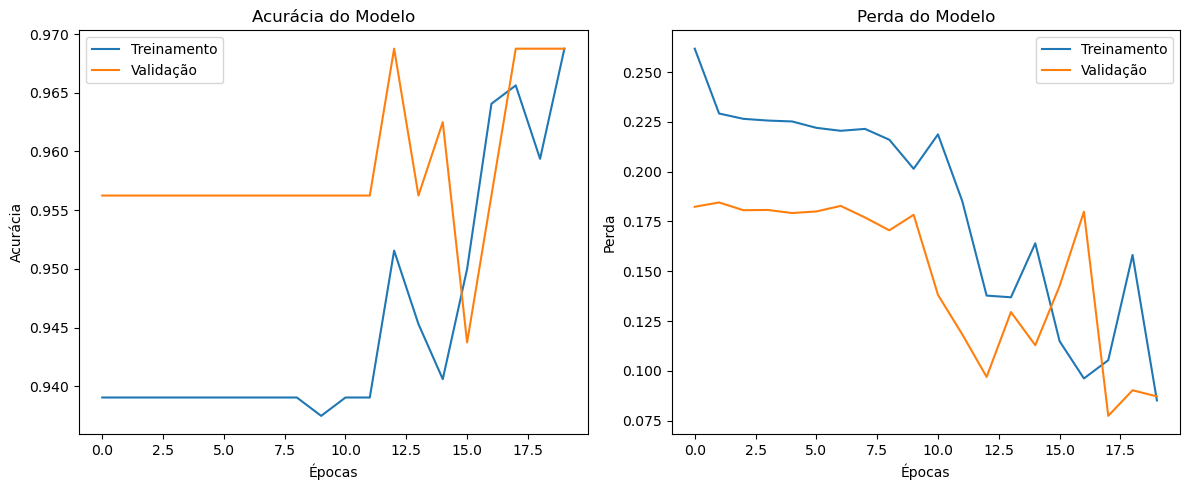

In [26]:
# Visualizando os resultados
plt.figure(figsize=(12,5))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()